In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df = df.dropna(axis=1, how='all')

In [13]:
df = df.drop(columns =['id'])

In [14]:
df['diagnosis'] = df['diagnosis'].map({'M':1 , 'B':0})

In [19]:
df.info()
df['diagnosis'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

diagnosis
0    357
1    212
Name: count, dtype: int64

In [20]:
X = df.drop('diagnosis',axis =1)
y = df['diagnosis']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X = pd.DataFrame(X_scaled, columns =X.columns)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)

In [28]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [39]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm,"\n")

Confusion Matrix:
 [[70  1]
 [ 2 41]] 



In [46]:
cr = classification_report(y_test, y_pred)
print("Classification report:\n",cr)

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [44]:
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability for class 1
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)

ROC-AUC Score: 0.99737962659679


In [48]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

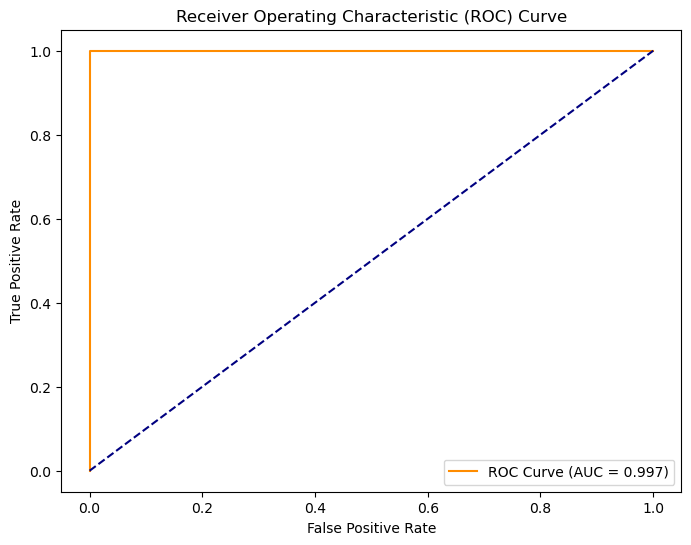

In [51]:
fpr, tpr, threshold = roc_curve(y_pred, y_prob)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'darkorange',label = 'ROC Curve (AUC = %0.3f)'% roc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

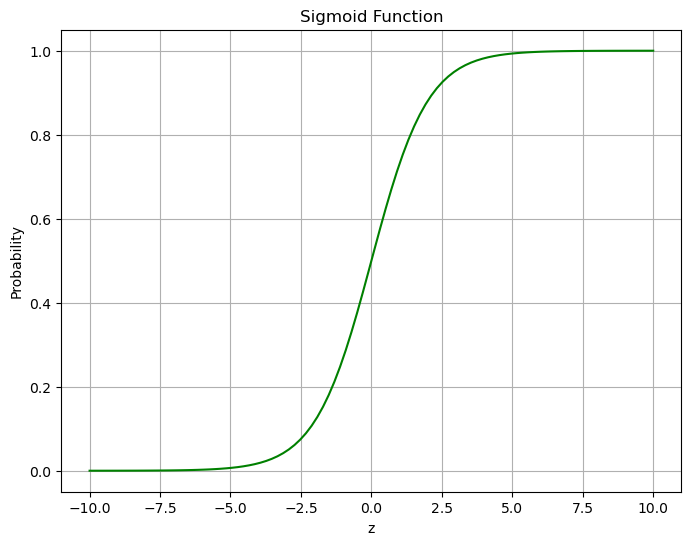

In [52]:
import numpy as np

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid, color='green')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Probability')
plt.grid()
plt.show()